In [1]:
import pandas as pd
import numpy as np

import sys
sys.path.append('../../pycore/')
from simulate import RBA_result
from utils import extract_details_from_rxnid

import matplotlib.pyplot as plt
import matplotlib.patches as mp
import seaborn as sns
import matplotlib.lines as mlines
%matplotlib inline

In [2]:
df_prot = pd.read_excel('../../build_GAMS_model/input/PROTEIN_stoich_curation_2021-09-28.xlsx')
df_prot.index = df_prot.id.to_list()

#### Simulation

In [3]:
df_path_sim = pd.read_excel('./manual_pathways_assignments.xlsx')

In [4]:
flistall = []

flist = ['vglc_0_5', 'vglc_1_0', 'vglc_2_0', 'vglc_3_0', 'vglc_4_0',
         'vglc_5_0', 'vglc_5_5']
flistall += flist
reslist = []
for fdir in flist:
    res = RBA_result(biom_id=None)
    res.load_from_json('../output/clim/results_capacitycorrected/' + fdir + '/RBA_result.json')
    reslist.append(res)
    
flist = ['vglc_5_6', 'vglc_5_7', 'vglc_6_0', 'vglc_7_0', 'vglc_8_0',
         'vglc_9_0', 'vglc_10_0', 'vglc_11_0', 'vglc_12_0', 'vglc_13_0',
         'vglc_14_0', 'vglc_15_0', 'vglc_16_0', 'vglc_17_0']
flistall += flist
for fdir in flist:
    res = RBA_result(biom_id=None)
    res.load_from_json('../output/batch/results_capacitycorrected/' + fdir + '/RBA_result.json')
    reslist.append(res)

In [5]:
N = len(reslist)
for i in range(0,N):
    res = reslist[i]
    resname = flistall[i]
    
    for j in df_path_sim.index:
        p = df_path_sim.protein[j]
        if p in res.proteome_allocation.keys():
            df_path_sim.loc[j, resname] = res.proteome_allocation[p]

#### Experimental

In [6]:
df_data_idx = pd.read_excel('./expmt_exflux_data.xlsx')

In [7]:
df_path_expmt_raw = pd.read_excel('./manual_pathways_assignments.xlsx')

In [8]:
expmt_data = dict()

for i in df_data_idx.index:
    # Load proteomics data
    i_exp = df_data_idx.data_id[i]
    df_data = pd.read_excel('../../parameterization/datasets/' + i_exp + \
                            '/' + i_exp + '.xlsx')
    df_data.index = df_data.id.to_list()
    
    # Conversion g/gDW -> g/gProtein. Conversion factor ptot = gProtein/gDW
    mu = df_data_idx.loc[i, 'GR_expmt (1/h)']
    ptot = (36.94 + 34.22*mu) / 100
    
    # Write to working dataframe
    df_path_expmt = df_path_expmt_raw.copy(deep=True)
    for j in df_path_expmt.index:
        p = df_path_expmt.protein[j]
        if p in df_data.index:
            gpgDW = df_data.loc[p, 'conc (g/gDW)']
            df_path_expmt.loc[j, 'conc (g/gProtein)'] = gpgDW / ptot
            
    expmt_data[i_exp] = df_path_expmt

#### Plot

In [9]:
pw = 'Glycolysis/PPP'

# Simulated
df = df_path_sim[df_path_sim.pathway == pw]
N = len(reslist)
x_sim, y_sim = [],[]
for i in range(0,N):
    res = reslist[i]
    x_sim.append(-res.metabolic_flux['EX_glc__D_e'])
    
    resname = flistall[i]
    y_sim.append(df[resname].fillna(0).sum())

# Experimental
x_exp, y_exp = [],[]
for i in df_data_idx.index:
    x_exp.append(df_data_idx.loc[i, 'Glucose uptake rate (mmol/gDW/h)'])
    
    expname = df_data_idx.data_id[i]
    df = expmt_data[expname]
    df = df[df.pathway == pw]
    y_exp.append(df['conc (g/gProtein)'].fillna(0).sum())

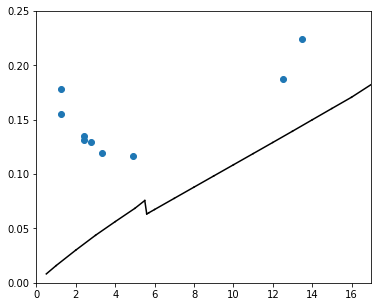

In [10]:
fig,ax = plt.subplots(figsize=(6,5))

# Plot model-predicted protein capacity usage
N = len(x_sim)
for i in range(0,N-1):
    p1 = [x_sim[i], x_sim[i+1]]; p2 = [y_sim[i], y_sim[i+1]]
    line = mlines.Line2D(p1, p2, color='k', linestyle='-')
    ax.add_line(line);
    
# Plot experimental protein capacity usage
ax.scatter(x_exp, y_exp)

ax.set_ylim(0,0.25);
ax.set_xlim(0,17);

In [11]:
pw = 'Ribosome'

# Simulated
df = df_path_sim[df_path_sim.pathway == pw]
N = len(reslist)
x_sim, y_sim = [],[]
for i in range(0,N):
    res = reslist[i]
    x_sim.append(-res.metabolic_flux['EX_glc__D_e'])
    
    resname = flistall[i]
    y_sim.append(df[resname].fillna(0).sum())

# Experimental
x_exp, y_exp = [],[]
for i in df_data_idx.index:
    x_exp.append(df_data_idx.loc[i, 'Glucose uptake rate (mmol/gDW/h)'])
    
    expname = df_data_idx.data_id[i]
    df = expmt_data[expname]
    df = df[df.pathway == pw]
    y_exp.append(df['conc (g/gProtein)'].fillna(0).sum())

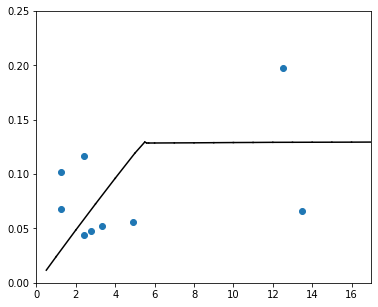

In [12]:
fig,ax = plt.subplots(figsize=(6,5))

# Plot model-predicted protein capacity usage
N = len(x_sim)
for i in range(0,N-1):
    p1 = [x_sim[i], x_sim[i+1]]; p2 = [y_sim[i], y_sim[i+1]]
    line = mlines.Line2D(p1, p2, color='k', linestyle='-')
    ax.add_line(line);
    
# Plot experimental protein capacity usage
ax.scatter(x_exp, y_exp)

ax.set_ylim(0,0.25);
ax.set_xlim(0,17);

In [13]:
pw = 'TCA/Energy'

# Simulated
df = df_path_sim[df_path_sim.pathway == pw]
N = len(reslist)
x_sim, y_sim = [],[]
for i in range(0,N):
    res = reslist[i]
    x_sim.append(-res.metabolic_flux['EX_glc__D_e'])
    
    resname = flistall[i]
    y_sim.append(df[resname].fillna(0).sum())

# Experimental
x_exp, y_exp = [],[]
for i in df_data_idx.index:
    x_exp.append(df_data_idx.loc[i, 'Glucose uptake rate (mmol/gDW/h)'])
    
    expname = df_data_idx.data_id[i]
    df = expmt_data[expname]
    df = df[df.pathway == pw]
    y_exp.append(df['conc (g/gProtein)'].fillna(0).sum())

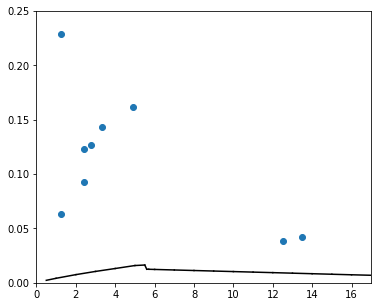

In [14]:
fig,ax = plt.subplots(figsize=(6,5))

# Plot model-predicted protein capacity usage
N = len(x_sim)
for i in range(0,N-1):
    p1 = [x_sim[i], x_sim[i+1]]; p2 = [y_sim[i], y_sim[i+1]]
    line = mlines.Line2D(p1, p2, color='k', linestyle='-')
    ax.add_line(line);
    
# Plot experimental protein capacity usage
ax.scatter(x_exp, y_exp)

ax.set_ylim(0,0.25);
ax.set_xlim(0,17);